# Analysis of the Film Industry for Business Expansion
##  Project Overview

In response to the growing trend of major corporations producing original content, our company is launching a data-driven initiative to establish a successful movie studio. Given our limited experience in film production, this project relies on a comprehensive analysis of film industry datasets to extract actionable insights.

Our primary goal is to understand which aspects of the film industry—genres, directors, languages, and markets—are most closely associated with critical acclaim and financial success. These insights will inform a strategy that aligns creative projects with business objectives.


##  Business Objective

The film production landscape is increasingly influenced by streaming platforms, international markets, and digital distribution. To navigate this complexity, we must identify the key factors behind successful films using reliable, data-backed evidence.

Through this analysis, we aim to:

- Identify **genres** consistently praised by critics.
- Determine **genres** with the highest **Return on Investment (ROI)** potential.
- Recognize **directors** whose films perform well in **international markets**.
- Discover **languages** most commonly associated with successful films.


## Strategic Impact

By answering these core questions, we will equip our studio team with the knowledge to:

- Prioritize projects that are both critically and commercially promising.
- Invest wisely in film concepts with high audience appeal and strong market potential.
- Build a foundation for long-term success in the competitive entertainment industry.

Let’s begin by exploring the data and uncovering the stories behind the numbers.

# Loading and Exploring Datasets

Before diving into analysis, it is essential to thoroughly explore each of the datasets and database tables we are working with. Our data sources span multiple reputable platforms, providing a comprehensive view of the film industry from both commercial and critical perspectives.

### Datasets in Use:

- **Box Office Mojo**
- **IMDb**
- **Rotten Tomatoes (Movies)**
- **Rotten Tomatoes (Critic Reviews)**
- **TheMovieDB**
- **The Numbers**
- **im.db** (SQLite database)


###  Why Data Exploration Matters

Data exploration is a critical step in any data-driven project. It helps us:

- Understand the **structure, quality, and characteristics** of each dataset.
- Identify and address issues such as **missing values**, **duplicates**, and **inconsistent formatting**.
- Analyze **distributions** and **relationships** between variables to uncover initial patterns.
- Develop an informed plan for **data cleaning**, **transformation**, and **integration**.

By doing this, we reduce the risk of errors.

In [11]:
# import the necessary libraries
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Load all datasets into pandas dataframes

In [12]:
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
rt_reviews_df = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
rt_reviews_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [14]:
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
tn_budget_df = pd.read_csv('tn.movie_budgets.csv')
tn_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [16]:
rt_info_df = pd.read_csv('rotten_tomatoes_movies.csv')
rt_info_df

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [17]:
# establish a connection to the database
path = ("Data\im.db\im.db")
conn = sqlite3.connect(path)

In [18]:
#create a cursor 
cursor = conn.cursor()

In [19]:
# Query the SQLite database to list all table names
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [20]:
#close connection
conn.close()

# Data Exploration.

To begin our analysis, we used two powerful Visual Studio Code extensions—**Data Wrangler** and **SQLite Viewer**—to streamline initial data understanding and cleaning.

###  Data Wrangler
- Visual summaries of column distributions and data types  
- Automatic detection of missing values, duplicates, and outliers  
- Quick, no‑code filtering, sorting, and grouping  
- Dataset profiling with cleaning/transformation suggestions  

###  SQLite Viewer
- Instant previews of table structures, columns, and sample data  
- Easy navigation between related tables  
- Hands‑on insight into schemas, data completeness, and record volumes  

**Outcome**: With these tools, we rapidly uncovered key patterns, inconsistencies, and relationships—without manual coding.


##  Selected Columns for Analysis
###  Rotten Tomatoes
- `movie_title`, `genres`, `tomatometer_rating`, `audience_rating` – to assess both critic and audience reception across genres  
###  TMDB
- `language`, `popularity` – to explore how film language impacts engagement and potential reach  
### The Numbers
- `movie`, `production_budget`, `worldwide_gross` – to calculate ROI and investigate profitability trends  
### IM.db
- Data extracted from `directors`, `persons`, and `movie_akas` – to match directors with films for evaluating worldwide box‑office impact  
These fields exhibit minimal to no missing values and have high entry uniqueness, ensuring data reliability.

## Important Notes on Data Usage

- **Rotten Tomatoes Dataset**: we replaced the original rotten tomato datasets with a more complete version from [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv) due to missing `movie_title` in the original dataset  which was a requirement in our analysis.
- **Excluded Datasets**:
  - *Box Office Mojo*: Data overlap with The Numbers movie budget dataset, which has more comprehensive financials. 
  - *Rotten Tomatoes Critic Reviews*: Unnecessary, as essential rating data is present in the Movies Info dataset. 

# Data Preparation & Cleaning

Before conducting meaningful analysis, it is essential to prepare and clean the data appropriately. Although our earlier exploration suggests that the datasets are relatively high quality, they originate from diverse sources and therefore require alignment for consistency and accuracy.

Data preparation involves:

- Filtering relevant columns
- Renaming fields for consistency
- Handling duplicates or inconsistencies
- Parsing multi-value fields
- Merging datasets where necessary

This step ensures that our analysis is based on a reliable, well-structured foundation.



## Preparing Rotten Tomatoes Ratings and Genres Data

To explore the relationship between **movie genres**, **ratings**, and **success metrics**, we focus first on preparing the **Rotten Tomatoes Movies** dataset. This dataset offers rich metadata for a wide array of films, including elements crucial to understanding **audience perception** and **genre trends**.

Our objectives here are to:

- Extract key attributes that reflect critical and audience reception
- Standardize genre information for analytical use
- Enable cross-comparison with financial and market performance data



## Extracting Ratings and Genres

We will extract and clean the following key columns from the dataset:

- **`movie_title`** – The title of the movie as listed on Rotten Tomatoes.
- **`genres`** – A comma-separated list of genres assigned to each movie (e.g., *Drama, Comedy, Action*).
- **`audience_rating`** – The average rating given by audiences, usually on a scale of 0 to 100.
- **`tomatometer_rating`** – The percentage of positive critic reviews (Tomatometer score).

> **Note**: Since many movies belong to **multiple genres**, genre parsing must be handled carefully to allow accurate aggregation and trend analysis.

By preparing this data effectively, we enable deeper insights into how **genre** and **reception** correlate with **film success**, supporting the strategic decision-making goals of our new studio.

In [21]:
# Extracting the relevant columns
df_rt = rt_info_df[["movie_title","genres","audience_rating","tomatometer_rating"]].copy()

# Convert the comma-separated string into a list
df_rt['genres'] = df_rt['genres'].str.split(', ')
# Expanding the genres
rt_movies_expanded = df_rt.apply(
    lambda x: pd.Series(x['genres']), axis=1
).stack().reset_index(level=1, drop=True).to_frame('genres').join(
    df_rt.drop('genres', axis=1), how='left'
).reset_index(drop=True)
rt_movies_expanded.head()

,genres,movie_title,audience_rating,tomatometer_rating
0,Action & Adventure,Percy Jackson & the Olympians: The Lightning T...,53.0,49.0
1,Comedy,Percy Jackson & the Olympians: The Lightning T...,53.0,49.0
2,Drama,Percy Jackson & the Olympians: The Lightning T...,53.0,49.0
3,Science Fiction & Fantasy,Percy Jackson & the Olympians: The Lightning T...,53.0,49.0
4,Comedy,Please Give,64.0,87.0


By using apply() with pd.Series and reset_index(drop=True), we effectively transform a DataFrame with list-like entries in a column into a more analysis-friendly format with one entry per row and a clean index.

In [22]:
# Comparing the number of rows for main df and the expanded df 
print(f"main: {rt_info_df.shape[0]} rows")
print(f"expanded: {rt_movies_expanded.shape[0]} rows")

main: 17712 rows
expanded: 39369 rows


By comparing the row counts before and after expanding the DataFrame’s list-like column, we can verify that each movie’s multiple genres have been successfully separated into individual rows. A higher row count in the expanded version confirms the transformation worked as intended.

In [23]:
# Seeing if the number of unique movie_title values matches with the main
print(f"expanded: {len(rt_movies_expanded['movie_title'].unique())} unique values")
print(f"main df: {len(rt_info_df['movie_title'].unique())} unique values")

expanded: 17087 unique values
main df: 17106 unique values


## DATA CLEANING 
Our data exploration confirms that there are no duplicates and each column has distinct values, indicating a well-structured dataset. There are some missing values, but since they are minimal, we can remove the affected rows without compromising data integrity. Dropping these few records is unlikely to impact the overall accuracy of our cleaned dataset.

In [24]:
#  Checking if missing values align with data exploration findings
missing_counts = rt_movies_expanded.isna().sum()
total_rows = rt_movies_expanded.shape[0]
missing_percentages = (missing_counts / total_rows) * 100

# Using info() method (shows similar info)
rt_movies_expanded.info()

# Round to 4 decimal places
(rt_movies_expanded.isna().sum()/len(rt_movies_expanded)*100).round(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39369 entries, 0 to 39368
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genres              39369 non-null  object 
 1   movie_title         39369 non-null  object 
 2   audience_rating     38880 non-null  float64
 3   tomatometer_rating  39277 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


genres                0.0000
movie_title           0.0000
audience_rating       1.2421
tomatometer_rating    0.2337
dtype: float64

Our check confirms that the missing values 0% to 1%. We can now proceed with dropping the rows containing missing values.

In [25]:
# Dropping rows with missing values under'audience_rating' and 'tomatometer_rating'
rt_movies_expanded_cleaned = (
    rt_movies_expanded
    .dropna(subset=[ "audience_rating", "tomatometer_rating"])
    .reset_index(drop=True)
)

# Checking if there are any missing values left
rt_movies_expanded_cleaned.isna().sum()

genres                0
movie_title           0
audience_rating       0
tomatometer_rating    0
dtype: int64

### Standardizing text columns
To prevent mismatches during grouping, filtering, or searching—such as treating “Comedy” and “comedy” as different categories—we standardize text by converting both the movie_title and genres columns to lowercase.

In [26]:
# Making sure to work on a copy to avoid the SettingWithCopyWarning
rt_movies_expanded_cleaned = rt_movies_expanded_cleaned.copy()

# Standardizing columns to lowercase
rt_movies_expanded_cleaned["genres"] = rt_movies_expanded_cleaned["genres"].str.lower()
rt_movies_expanded_cleaned["movie_title"] = rt_movies_expanded_cleaned["movie_title"].str.lower()

rt_movies_expanded_cleaned.head()

,genres,movie_title,audience_rating,tomatometer_rating
0,action & adventure,percy jackson & the olympians: the lightning t...,53.0,49.0
1,comedy,percy jackson & the olympians: the lightning t...,53.0,49.0
2,drama,percy jackson & the olympians: the lightning t...,53.0,49.0
3,science fiction & fantasy,percy jackson & the olympians: the lightning t...,53.0,49.0
4,comedy,please give,64.0,87.0


 ### Aggregating Ratings by Genre
We grouped the cleaned DataFrame by genre and calculated the mean audience and Tomatometer ratings. This gives us insight into genre-level trends and preferences, rather than individual movie performance—revealing which genres resonate most with critics and audiences

In [27]:
# Grouping by genres and aggregating the mean of audience_rating and tomatometer_rating
genre_rating_df = rt_movies_expanded_cleaned.groupby('genres').agg({
    'audience_rating': 'mean',
    'tomatometer_rating': 'mean'
}).reset_index()

# Formatting the ratings to show only one decimal place
genre_rating_df['audience_rating'] = genre_rating_df['audience_rating'].round(1)
genre_rating_df['tomatometer_rating'] = genre_rating_df['tomatometer_rating'].round(1)

genre_rating_df

,genres,audience_rating,tomatometer_rating
0,action & adventure,57.9,54.2
1,animation,65.7,64.1
2,anime & manga,75.0,75.4
3,art house & international,66.5,71.0
4,classics,71.0,78.4
5,comedy,58.4,55.1
6,cult movies,55.8,60.5
7,documentary,73.3,80.9
8,drama,63.1,63.2
9,faith & spirituality,70.3,63.9


In [28]:
# Confirming no genres were lost after aggregation
len(rt_movies_expanded_cleaned['genres'].value_counts()) == len(genre_rating_df)

True

### Genre and ROI data.
We begin by preparing two key dimensions: `genre` and `Return on Investment (ROI)`. `Genre` data—sourced from rt_movies, while `ROI` derived from tn.movie_budgets using production budgets and worldwide gross—measures each movie’s profitability.We will merge the tn.movie_budgets dataset (which contains production budgets and worldwide gross revenue) with the rt_movies dataset (which includes genre information).  By merging these tables on movie title, we create a comprehensive dataset that enables us to analyze which genres are most financially successful and guide strategic decisions for future productions.

In [29]:
# Prepare movie titles for better matching (remove special characters, lower case)
tn_budget_df['movie'] = tn_budget_df['movie'].str.strip().str.lower()
rt_info_df['movie_title'] =rt_info_df['movie_title'].str.strip().str.lower()

# Merge the datasets on the appropriate columns
merged_df = tn_budget_df.merge(rt_info_df[['movie_title', 'genres']], left_on='movie', right_on='movie_title', how='left')

# Drop duplicate movie_title column if you want
merged_df = merged_df.drop(columns=['movie_title'])

merged_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279","Action & Adventure, Comedy, Mystery & Suspense..."
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action & Adventure, Comedy, Science Fiction & ..."
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action & Adventure, Drama, Science Fiction & F..."
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action & Adventure, Science Fiction & Fantasy"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN


### ROI Calculation
ROI (Return on Investment) is a vital financial metric that measures the movie’s profitability relative to its production cost.By computing ROI for each film, we can understand the most financially successful movies and use those insights to guide future production decisions.
The calculation of ROI will be based on the formula below:

**ROI = (Worldwide Gross - Production Budget) ÷ Production Budget × 100**

In [30]:
# Clean up the dollar signs and commas and convert columns to numeric
merged_df['production_budget'] = merged_df['production_budget'].replace([r'[\$,]'], '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace([r'[\$,]'], '', regex=True).astype(float)

# Calculate ROI
merged_df['ROI (%)'] = ((merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget']) * 100

# Round ROI to nearest whole number
merged_df['ROI (%)'] = merged_df['ROI (%)'].round()

# Group by 'movie' and calculate the mean ROI (though each movie is unique here)
roi_grouped = merged_df.groupby('movie')[['ROI (%)']].mean().reset_index()

# Final table: Comparison between genres and the grouped movie ROI, while keeping the production_budget and worldwide_gross columns
final_table = merged_df[['genres', 'movie', 'production_budget', 'worldwide_gross']].merge(roi_grouped, on='movie')

final_table.head()

,genres,movie,production_budget,worldwide_gross,ROI (%)
0,"Action & Adventure, Comedy, Mystery & Suspense...",avatar,425000000.0,2.776345e+09,553.0
1,"Action & Adventure, Comedy, Science Fiction & ...",pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
2,"Action & Adventure, Drama, Science Fiction & F...",dark phoenix,350000000.0,1.497624e+08,-57.0
3,"Action & Adventure, Science Fiction & Fantasy",avengers: age of ultron,330600000.0,1.403014e+09,324.0
4,NaN,star wars ep. viii: the last jedi,317000000.0,1.316722e+09,315.0


### Checking for missing values 

In [31]:
final_table.isna().sum()

genres               1264
movie                   0
production_budget       0
worldwide_gross         0
ROI (%)                 0
dtype: int64

Because the genres column has 1,264 missing values and is essential to our analysis we will drop those rows. Removing them won’t significantly impact our dataset’s integrity or our ability to draw meaningful insights.

In [32]:
final_table.dropna(subset=['genres'], inplace=True)

### Expanding movies into individual genres
We expand each movie’s genre information into separate rows—one per genre—to analyze how individual genres influence a film’s success. Since movies often span multiple genres, this breakdown allows us to assess performance at the genre level. This approach helps us identify which genres are the most financially rewarding and supports strategic decisions on what types of films to prioritize in the future.

In [33]:
def expanded_genres_manual(df):
   
   # Initialize empty list to store all the new rows
   new_rows = []
   
   # Iterate through each row in the original DataFrame
   # idx = index, row = pandas Series containing the row data
   for idx, row in df.iterrows():
       
       # Split the genres column by comma and remove whitespace from each genre
       # Example: "Action, Comedy, Drama" becomes ["Action", "Comedy", "Drama"]
       genres_cleaned = [genre.strip() for genre in row['genres'].split(',')]
       
       # For each individual genre, create a new row
       for genre in genres_cleaned:
           
           # Convert the pandas Series to a dictionary to make it mutable
           # This copies all the original column values
           new_row = dict(row)
           
           # Replace the original comma-separated genres with the single genre
           new_row['genres'] = genre
           
           # Add this new row to our collection
           new_rows.append(new_row)
   
   # Convert the list of dictionaries back into a pandas DataFrame
   return pd.DataFrame(new_rows)

# Call the function to explode the genres in final_table
# This will transform rows with multiple genres into multiple rows with single genres
expanded_table = expanded_genres_manual(final_table)
expanded_table


,genres,movie,production_budget,worldwide_gross,ROI (%)
0,Action & Adventure,avatar,425000000.0,2.776345e+09,553.0
1,Comedy,avatar,425000000.0,2.776345e+09,553.0
2,Mystery & Suspense,avatar,425000000.0,2.776345e+09,553.0
3,Science Fiction & Fantasy,avatar,425000000.0,2.776345e+09,553.0
4,Action & Adventure,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
...,...,...,...,...,...
10904,Mystery & Suspense,following,6000.0,2.404950e+05,3908.0
10905,Comedy,my date with drew,1100.0,1.810410e+05,16358.0
10906,Documentary,my date with drew,1100.0,1.810410e+05,16358.0
10907,Special Interest,my date with drew,1100.0,1.810410e+05,16358.0


### Cleaning, Grouping  ROI by Genre
We begin by cleaning the data—removing any rows with missing or invalid values to ensure reliable results—then group the movies by genre to calculate each genre’s average Return on Investment (ROI). Finally, we sort the genres by their mean ROI to reveal the top performers and inform future production strategies.

In [34]:
# Drop rows with NULLs in important columns
expanded_table = expanded_table.dropna(subset=['genres', 'movie', 'ROI (%)'])

# Group by 'genres' and calculate average ROI, production_budget, and worldwide_gross
grouped_table = expanded_table.groupby('genres').agg({
    'ROI (%)': 'mean',              # Average ROI
    'production_budget': 'mean',    # Average production_budget
    'worldwide_gross': 'mean'       # Average worldwide_gross
}).reset_index()

# Sort by ROI in descending order
grouped_table = grouped_table.sort_values(by='ROI (%)', ascending=False)

# Reset index to clean it up
grouped_table = grouped_table.reset_index(drop=True)

grouped_table.head()

,genres,ROI (%),production_budget,worldwide_gross
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07
1,Horror,975.298217,2.464406e+07,7.716784e+07
2,Special Interest,932.209677,1.217236e+07,3.201614e+07
3,Documentary,868.586466,1.323879e+07,3.199423e+07
4,Classics,839.873684,3.186409e+07,1.034252e+08


 ### Normalizing ROI Percentages
To make genres’ ROI values comparable, we normalize them so their percentages sum to 100%. This is done by dividing each genre’s ROI by the total ROI across all genres and then multiplying by 100 letting us see each genre’s share of the overall ROI.

In [35]:
# Normalize ROI values: divide each ROI by the sum of all ROIs, then multiply by 100
# This converts absolute ROI values to relative percentages that sum to exactly 100%
grouped_table['normalized_ROI'] = (grouped_table['ROI (%)'] / grouped_table['ROI (%)'].sum()) * 100
grouped_table

,genres,ROI (%),production_budget,worldwide_gross,normalized_ROI
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07,31.341139
1,Horror,975.298217,2.464406e+07,7.716784e+07,6.545445
2,Special Interest,932.209677,1.217236e+07,3.201614e+07,6.256269
3,Documentary,868.586466,1.323879e+07,3.199423e+07,5.829279
4,Classics,839.873684,3.186409e+07,1.034252e+08,5.636581
5,Sports & Fitness,740.619048,2.526810e+07,7.822937e+07,4.970461
6,Television,695.370370,2.903874e+07,8.745679e+07,4.666787
7,Faith & Spirituality,652.086957,1.010326e+07,1.855955e+07,4.376302
8,Animation,527.445783,8.096078e+07,2.969315e+08,3.539807
9,Musical & Performing Arts,509.462766,2.771714e+07,1.086628e+08,3.419119


In [36]:
# Check if the sum of normalized ROIs is 100
assert abs(grouped_table['normalized_ROI'].sum() - 100) < 1e-2, "The normalized ROIs don't sum to 100!"

### Preparing Language and Popularity Data
To help the company identify the most successful film types at the box office, we focus on two key features from The Movie DB dataset: original_language and popularity. The original_language field gives insight into which language markets (e.g., English, Spanish) perform best commercially, supporting decisions on which languages to target for wider or niche audience reach. Meanwhile, the popularity column reflects audience engagement and interest—making it a strong indicator of a film’s appeal and public traction.

Before proceeding, we reviewed the dataset using the Data Wrangler tool to examine these columns. This initial exploration confirmed that both original_language and popularity are complete, with no missing values. As a result, no additional cleaning is needed.

We'll keep the dataset as-is and apply specific filters during analysis to extract relevant insights while preserving the original data structure.

In [37]:
# checking the first five rows of the data set
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


 ### Preparing Directors and Foreign Gross Data
To analyze the connection between directors and their films’ worldwide gross earnings, we begin by aligning two datasets: the `im.db` tables and the `movie budgets` dataset. Based on prior data exploration, we've confirmed that these datasets contain no missing values in the relevant fields, allowing us to proceed without any imputation. Since they come from different sources with varied structures, careful filtering and merging are necessary to maintain accuracy.

#### Extracting Director and Movie Title Data
Our first step is to extract a refined dataset containing each `director’s name` alongside their associated `movie title` from the `im.db` database. The challenge here is that the directors table doesn’t directly store names—instead, it references the persons table for director names. Likewise, movie titles are located in the movie_akas table, which maps movies to their alternate regional titles.

To ensure data integrity and eliminate duplication caused by variations in title entries, we use a `DISTINCT` query. This helps us obtain unique director–movie pairs based solely on original movie titles, minimizing redundancy and improving the quality of our analysis.



In [38]:
# Connect to the database
conn = sqlite3.connect('Data\im.db\im.db')

# Updated query with DISTINCT
query = '''
SELECT DISTINCT
    p.primary_name AS director_name,
    ma.title AS movie_title,
    mb.start_year
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_akas ma ON d.movie_id = ma.movie_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
WHERE ma.is_original_title = 1
'''

# Execute the query and load into a DataFrame
directors_df = pd.read_sql_query(query, conn)

# Close connection
conn.close()
directors_df.head()

,director_name,movie_title,start_year
0,Colin Trevorrow,Jurassic World,2015
1,Andrew Stanton,John Carter,2012
2,Marc Jampolsky,Versailles Rediscovered - The Sun King's Vanis...,2019
3,Sam Zubrycki,Miguelito - Canto a Borinquen,2019
4,Henning Beckhoff,Thing I Don't Get,2018


### Merge Directors with Worldwide Gross Data
At this point, we will combine the director information with the worldwide gross earnings.
This will ensures that each movie in our dataset is matched with both its director and its revenue performance,this will help in having meaningful analysis.

In [39]:
# Create copies and cleaning
tn_clean = tn_budget_df.copy()
directors_clean = directors_df.rename(columns={'movie_title': 'movie'}).copy()

# Apply transformations using map
for df in [tn_clean, directors_clean]:
    df['movie'] = df['movie'].str.lower()

# Merge and process
directors_fgross_df = (pd.merge(tn_clean[['movie', 'worldwide_gross']], 
                               directors_clean, 
                               on='movie', 
                               how='inner')
                      .reindex(columns=['movie', 'director_name', 'worldwide_gross', 'start_year'])
                      .sort_values('director_name')
                      .reset_index(drop=True))
directors_fgross_df

,movie,director_name,worldwide_gross,start_year
0,akira,A.R. Murugadoss,"$19,585",2016
1,bully,Aaron Alon,"$1,381,824",2017
2,restless,Aaron Boltz,"$2,772,511",2012
3,circle,Aaron Hann,"$10,024",2015
4,teen titans go! to the movies,Aaron Horvath,"$51,620,593",2018
...,...,...,...,...
2443,along the roadside,Zoran Lisinac,"$3,234",2013
2444,prophecy,Zuri Rinpoche,"$22,673,340",2015
2445,perfectos desconocidos,Álex de la Iglesia,"$31,166,312",2017
2446,9,Éric Tessier,"$48,559,999",2016


### Aggregating Worldwide Gross by Director
Since a director may have multiple films, we consolidate their worldwide gross earnings by summing the gross across all their movies. This aggregation produces a director-level total revenue figure, giving us a clearer view of each director's overall box office impact.

In [40]:
# Remove commas, dollar sign and convert to float for calculation
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r',', '', regex=True)
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r'\$', '', regex=True).astype(float)

# Group by director_name and sum worldwide_gross
agg_directors_df = directors_fgross_df.groupby('director_name', as_index=False)['worldwide_gross'].sum()

# Sort by worldwide_gross in descending order
agg_directors_df = agg_directors_df.sort_values(by='worldwide_gross', ascending=False).reset_index(drop=True)

# Format numbers with commas 
agg_directors_df['worldwide_gross'] = agg_directors_df['worldwide_gross'].apply(lambda x: f"{int(x):,}")
agg_directors_df

,director_name,worldwide_gross
0,Anthony Russo,"3,902,605,502"
1,Joe Russo,"3,902,605,502"
2,Pierre Coffin,"3,713,745,331"
3,Christopher Nolan,"3,086,180,484"
4,Joss Whedon,"2,992,084,614"
...,...,...
1683,Christian Sesma,0
1684,Deepak Rauniyar,0
1685,Russell Friedenberg,0
1686,Katie Aselton,0


# DATA ANALYSIS.

 ### Understanding Genre–Rating Relationships
Exploring how genres correlate with critics’ and audiences’ ratings is essential for making informed content decisions. By identifying which genres consistently earn high praise, studios can prioritize productions likely to achieve both critical acclaim and commercial success.

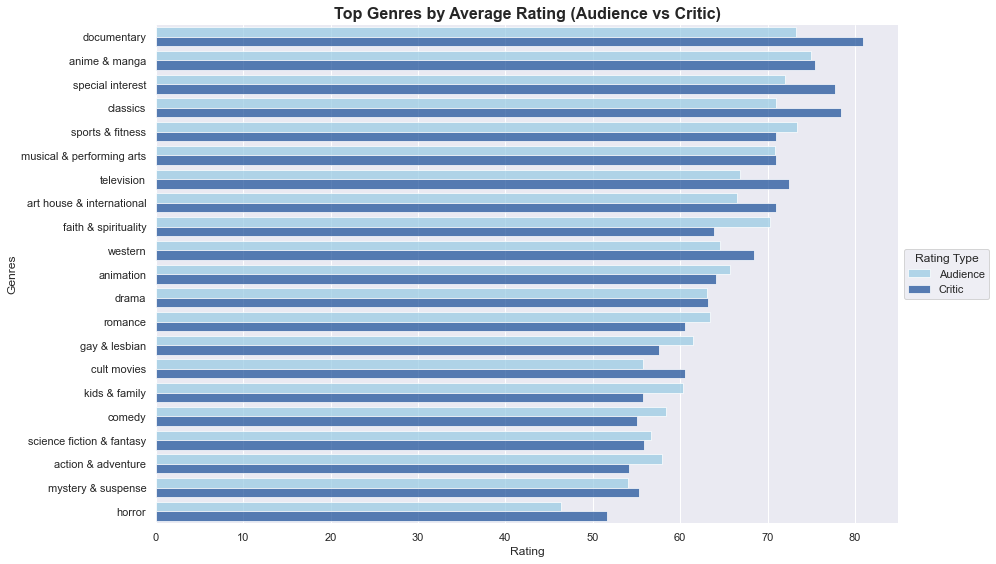

In [41]:
sns.set(style='darkgrid')
# Calculate the average rating of the two columns
genre_rating_df['average_rating'] = genre_rating_df[['audience_rating', 'tomatometer_rating']].mean(axis=1)
top_genres_df = genre_rating_df.sort_values('average_rating', ascending=False)  

# Reshape the data to long format for easy plotting with Seaborn
long_df = pd.melt(top_genres_df, id_vars='genres', value_vars=['audience_rating', 'tomatometer_rating'],
                  var_name='rating_type', value_name='rating')

# Set up the plot
plt.figure(figsize=(14, 8))

# Define the custom colors from the Blues_d palette
custom_palette = {'audience_rating': '#89CFF0', 'tomatometer_rating': '#0047AB'}  # Light blue for audience, dark blue for critic

# Plot the horizontal barplot with custom colors
sns.barplot(y='genres', x='rating', hue='rating_type', data=long_df, palette=custom_palette, errorbar=None, alpha=0.7)

# Customize the plot
plt.title('Top Genres by Average Rating (Audience vs Critic)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Move the legend to the right side of the grid and update legend labels
plt.legend(title='Rating Type', labels=['Audience', 'Critic'], loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

The bar chart provides a comparison of average audience and critic ratings across various genres. Key insights include:

- `Documentaries` stand out as the highest-rated genre by critics, and they also perform very well with audiences.

- `Anime & Manga`, `Special Interest`, and `Classics` are also among the top genres appreciated by both critics and audiences, indicating strong dual-market appeal.

- `Television` receives relatively high audience ratings but lower critic scores, suggesting it may appeal more to popular tastes than to critical standards.

- `Faith & Spirituality` and `Western` tend to score lower across both metrics, potentially indicating limited broad appeal or niche value.

- `Sports & Fitness` shows an interesting case where audience ratings surpass critic scores, implying mass appeal despite critical reservations.

Below we are checking whether there is a Correlation Between Audience and Critic Ratings;

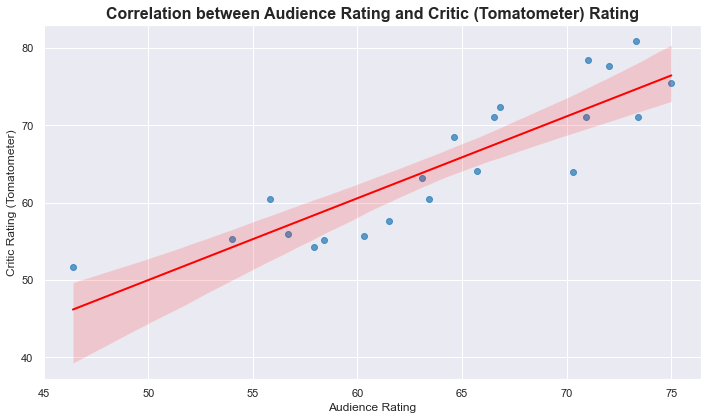

In [42]:
plt.figure(figsize=(10, 6))

# Create the scatterplot with a line of best fit
sns.regplot(data=genre_rating_df, x='audience_rating', y='tomatometer_rating', 
            scatter_kws={'color': '#1f77b4', 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Add a title and labels
plt.title('Correlation between Audience Rating and Critic (Tomatometer) Rating', fontsize=16, weight='bold')
plt.xlabel('Audience Rating', fontsize=12)
plt.ylabel('Critic Rating (Tomatometer)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Genre–Ratings Correlation & Strategic Insights
The scatter plot shows a clear positive relationship between audience and critic ratings:

- Positive correlation: The regression line slopes upward, indicating that genres favored by viewers often receive strong critic reviews, supporting the idea that appealing to audiences and critics can go hand in hand. 

- Noticeable variance: Even with similar audience scores, critic ratings vary—highlighting the importance of considering both metrics rather than relying on audience sentiment alone.

## Strategic Implications
- Focus on dual-appeal genres:
Prioritize genres like Documentary, Classics, and Anime & Manga, which consistently outrank the others in both audience and critic reception.
- Leverage niche strengths:
Films in Special Interest and Musical & Performing Arts may cater to smaller audiences but show high satisfaction among both critics and fans.
- Be mindful of underperformers:
Genres such as Faith & Spirituality and Western tend to score low across the board—investments here carry greater risk.
- Blend genres carefully:
Combining high-performing genres (e.g., a documentary-style classic or anime) can be powerful, but requires cautious execution to maintain genre strengths.
- Capitalize on audience-driven genres:
While Television and Sports & Fitness may not please critics, they often generate solid box office returns when marketed to enthusiastic fans.

### Understanding Genre and ROI
For any new studio or film investor, knowing which genres deliver the highest ROI is essential for making profitable, risk-aware choices. Unlike total box-office takings, ROI incorporates both revenue and cost—offering a clearer picture of financial efficiency

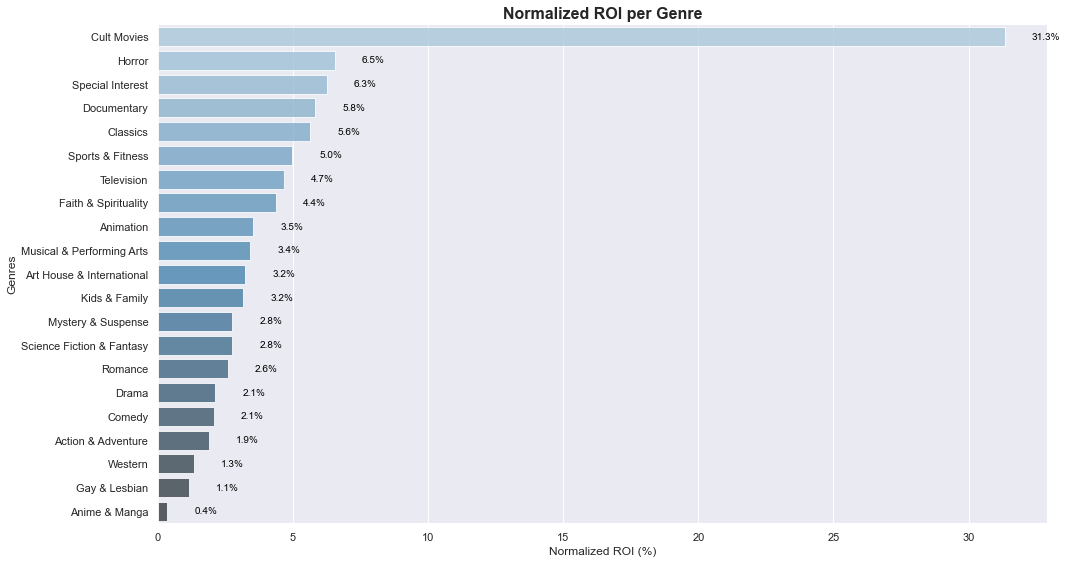

In [43]:
# Use seaborn's built-in theming (works with all versions)
sns.set_theme(style="darkgrid")  # Use set_theme instead of set

# Create figure
plt.figure(figsize=(15, 8))

# Sort data
grouped_sorted = grouped_table.sort_values('normalized_ROI', ascending=False)

# Create barplot
ax = sns.barplot(data=grouped_sorted, x='normalized_ROI', y='genres', 
                 palette='Blues_d', alpha=0.8)

# Add annotations
for i, (roi, genre) in enumerate(zip(grouped_sorted['normalized_ROI'], grouped_sorted['genres'])):
    ax.text(roi + 1, i, f'{roi:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Styling
plt.title('Normalized ROI per Genre', fontsize=16, weight='bold')
plt.xlabel('Normalized ROI (%)', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

## Genre ROI Insights & Strategic Guidance
### Key Observations from the Normalized ROI Chart
- Cult Movies dominate with a significantly high normalized ROI (~31.3%), suggesting that niche appeal and dedicated fanbases can drive exceptional returns despite lower budgets.
- Genres like Horror (6.5%), Special Interest (6.3%), and Documentary (5.8%) also deliver strong ROI, benefiting from focused audiences and manageable production costs.
-Traditional blockbusters—Action & Adventure, Comedy, and Drama—have modest normalized ROI (~2%), likely due to significant production expenditures diluting profitability.
-Surrounding the lower end are genres such as Western, Gay & Lesbian, and Anime & Manga, which show minimal ROI, indicating limited appeal or return relative to investment.

## Strategic Implications
- Embrace High-ROI Genres
Cult, horror, and documentary films provide cost-effective, high-return entry points—ideal for new studios building financial momentum.
- Balance Artistic Vision and Budget
While dramas or action titles might have strong creative appeal, early-stage studios may benefit more from genres with proven ROI and lower costs.
- Use Niche Genres Selectively
Low-ROI genres might still serve branding or critical acclaim goals—but should be pursued with caution and supported by targeted audience research.
- Stay Adaptive to Trends
ROI performance can shift due to cultural changes or streaming trends; regular reassessment ensures alignment with emerging opportunities.
- Leverage Audience-Driven Genres for Commercial Success
Genres with mass appeal (like certain television and sports-themed content) may not win critical acclaim but can be profitable if marketed strategically.

### Core Insight
Targeting genres with strong ROI and loyal niche audiences allows studios to craft a sustainable production strategy—achieving alignment between artistic goals and financial health.

### Relationship between Language and Popularity
When launching a new movie studio, it is important to analyze the relationship between a film's language and its popularity. Language plays a major role in determining audience reach, cultural accessibility, and commercial success. By identifying which languages dominate film production and how those languages relate to popularity, stakeholders can make informed decisions about language selection in content creation.

Which Languages Dominate Movie Production?

To start, we analyze the languages with the highest volume of movie production—an important indicator of a large audience base, mature distribution networks, and well-established infrastructure for casting, marketing, and localization.

The bar plot below displays the top 15 most common movie languages by production volume

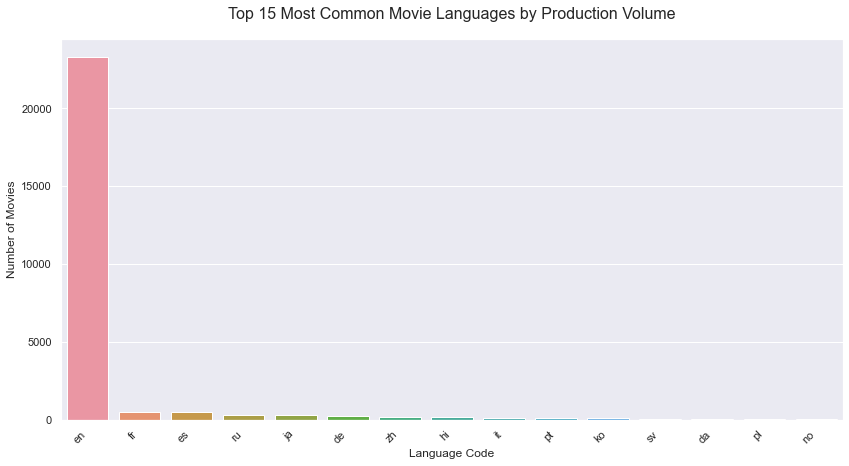

In [44]:
language_counts = tmdb_df['original_language'].value_counts().head(15)

# Create the plot
plt.figure(figsize=(14, 7))
sns.set_palette('Blues_d')
ax = sns.barplot(x=language_counts.index, y=language_counts.values)

# Customize the plot
plt.title('Top 15 Most Common Movie Languages by Production Volume', fontsize=16, pad=20)
plt.xlabel('Language Code', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

From the chart, we observe that:

- English (en) dominates with over 20,000 movies, far exceeding any other language.

- French (fr) and Spanish (es) follow as the second and third most common languages.

This trend indicates that most studios tend to produce content in English, which may be due to its global acceptance, availability of talent, and ease of distribution. For a new studio, prioritizing English-language productions may align with industry norms and maximize early traction.

## Popularity Distribution by Language: Beyond Just Volume

While production volume tells us what studios are doing, it doesn’t necessarily reflect what audiences prefer. To gain deeper insight, we analyze how popularity scores vary across languages using a box plot, which also helps us detect outliers — movies that achieve exceptional popularity.

Why focus on outliers?

Languages with frequent or extreme outliers may occasionally produce global blockbusters.

Outliers highlight potential for breakout success, even in languages with low production volume.

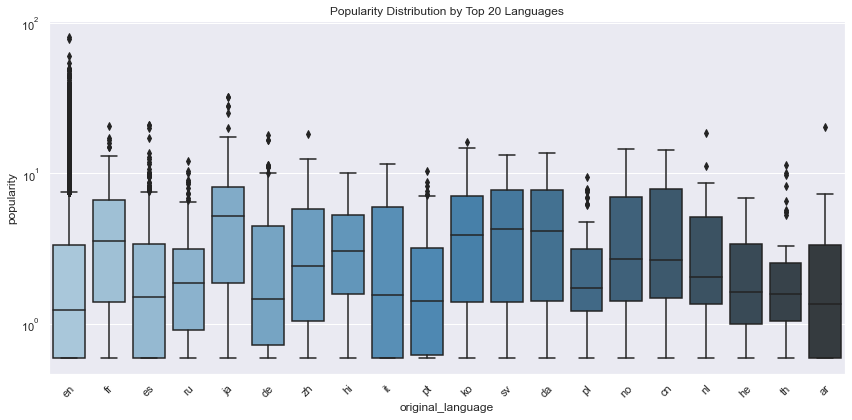

In [45]:
# Get top 20 languages by frequency in the dataset
top_languages = tmdb_df['original_language'].value_counts().head(20).index

# Create data dictionary mapping each language to its popularity values
lang_data = {lang: tmdb_df[tmdb_df['original_language'] == lang]['popularity'].values 
             for lang in top_languages}

# Convert nested dictionary data to a flat DataFrame format suitable for seaborn
plot_data = []
for lang, popularity_values in lang_data.items():
    # Create a row for each movie's popularity score within each language
    for pop in popularity_values:
        plot_data.append({'original_language': lang, 'popularity': pop})

# Convert list of dictionaries to DataFrame
plot_df = pd.DataFrame(plot_data)

# Create the visualization
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Create boxplot showing popularity distribution for each language
sns.boxplot(data=plot_df, x='original_language', y='popularity', palette='Blues_d')

# Add title and formatting
plt.title("Popularity Distribution by Top 20 Languages")
plt.yscale('log')  # Use logarithmic scale for better visualization of wide range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing to prevent label cutoff

# Display the plot
plt.show()

### Language & Popularity Insights
From the chart, we draw several key observations:

- English (en) leads in production and popularity, with numerous high-performing outliers—indicating its dominance and capacity to produce globally resonant films. 
academia.edu

- Japanese (ja), Spanish (es), French (fr), and Russian (ru) also exhibit strong outliers, suggesting that despite smaller overall production volumes, they can produce standout popular films. 
academia.edu

### Strategic Takeaways
- Lead with English: Leveraging English-language production remains the most reliable route for reaching broad audiences and achieving high popularity at scale.
- Invest in international outliers: Languages like French, Spanish, Japanese, and Russian are capable of producing high-impact, niche successes—it’s worthwhile for the studio to explore occasional multilingual or international projects.
- Stay adaptive: Popularity trends evolve—tracking language-based audience preferences ensures the studio continually aligns content with emerging demand.
- By aligning production strategy with both market saturation and popularity impact, the studio can achieve global appeal and a strong competitive advantage right from the outset.

 ### Understanding the Link: Directors & Worldwide Gross Earnings
“To inform our production strategy, we assess how a director’s involvement affects a film’s financial success. Directors shape the creative vision, which can significantly influence both audience reception and global box office revenue.” 
academia.edu
#### Why This Matters
Directors often guide the narrative and tone—factors that can heavily impact a film’s commercial appeal.

By analyzing worldwide gross totals per director, we can identify filmmakers who consistently deliver strong financial performance.

#### Strategic Takeaway
By focusing collaborations on directors with proven high-grossing track records, the studio aligns its output with box office success—advancing its goal of maximizing ROI from the start.

In [47]:
import plotly.express as px

# Select top 10 directors and sort from highest to lowest gross
# Note: Remove iloc[::-1] since we want highest to lowest order
top_10_directors = agg_directors_df.head(10)

# Sort explicitly by worldwide_gross in descending order to ensure highest to lowest
top_10_directors = top_10_directors.sort_values('worldwide_gross', ascending=False)

# Create interactive bar chart using Plotly Express
fig = px.bar(
    top_10_directors,                    # DataFrame containing the data
    x='director_name',                   # Column for x-axis (director names)
    y='worldwide_gross',                 # Column for y-axis (gross earnings)
    title='Top 10 Directors by Worldwide Gross',  # Chart title
    color='worldwide_gross',             # Color bars based on gross values
    color_continuous_scale='Blues',      # Use blue color gradient
    hover_data=['worldwide_gross']       # Show gross value on hover
)

# Customize the layout and appearance
fig.update_layout(
    width=1000,                         # Set chart width in pixels
    height=600,                         # Set chart height in pixels
    xaxis_title='Director Name',        # Label for x-axis
    yaxis_title='Worldwide Gross ($)',  # Label for y-axis with currency symbol
    font=dict(size=12),                 # Set default font size
    title_font_size=16,                 # Make title larger
    xaxis_tickangle=-45                 # Rotate x-axis labels for better readability
)

# Format y-axis to show currency values in billions/millions
fig.update_layout(
    yaxis=dict(
        tickformat='$,.0f',             # Format as currency with commas
        title_standoff=25               # Add space between axis and title
    )
)

# Update hover template to show formatted currency
fig.update_traces(
    hovertemplate='<b>%{x}</b><br>' +   # Director name in bold
                  'Worldwide Gross: $%{y:,.0f}<br>' +  # Formatted gross amount
                  '<extra></extra>'      # Remove default trace box
)

# Display the interactive chart
fig.show()



The bar chart highlights the ten most commercially successful directors based on worldwide gross revenue. Key observations include:

- Joe Russo and Anthony Russo dominate the chart, both nearing or exceeding the $3.9 billion mark. This reflects their significant contributions to blockbuster franchises, particularly within the Marvel Cinematic Universe.

- Pierre Coffin, known for animated films like Despicable Me and Minions, ranks just below, indicating the strong earning potential of animated family films.

- Christopher Nolan stands out as the only director in the top tier known for original, high-concept blockbusters, suggesting that originality paired with cinematic scale can also yield massive returns.

- Directors like Michael Bay, Joss Whedon, and Jon Favreau reflect the commercial power of action-heavy, effects-driven films and franchise-building.

- Overall, the data shows a clear trend: franchise integration, visual spectacle, and genre appeal (especially action, animation, and superhero films) consistently lead to high global box office success including amazing directors.

Strategic Implications:

- Leverage Proven Commercial Directors: Prioritize collaboration with or emulation of directors who have a proven track record of generating high worldwide gross, such as the Russo brothers, Christopher Nolan, and Michael Bay.

- Recognize the Value of Director Branding: Certain directors—especially those associated with major box office hits—carry brand equity that can drive audience interest and investment potential.

- Explore High-Grossing Collaboration Models: The presence of both Russo brothers individually suggests that co-directing or creative partnerships can lead to significant commercial outcomes when well executed.

- Balance Franchise Experience and Standalone Success: While many directors on the list gained success through major franchises, Christopher Nolan’s presence indicates that original content with strong direction can also achieve global financial success.

- Monitor Talent That Aligns With Studio Goals: For a new studio, targeting rising or mid-tier directors with similar styles or genres to those on the list could be a scalable and cost-effective way to replicate success patterns.

We should also explore the yearly gross revenues of the top 5 directors to assess whether their commercial success is driven by past achievements or if they are maintaining, declining, or improving over time. This analysis will provide insights into the sustainability of their success and how their recent films compare to earlier ones, highlighting whether their box office appeal remains consistent.

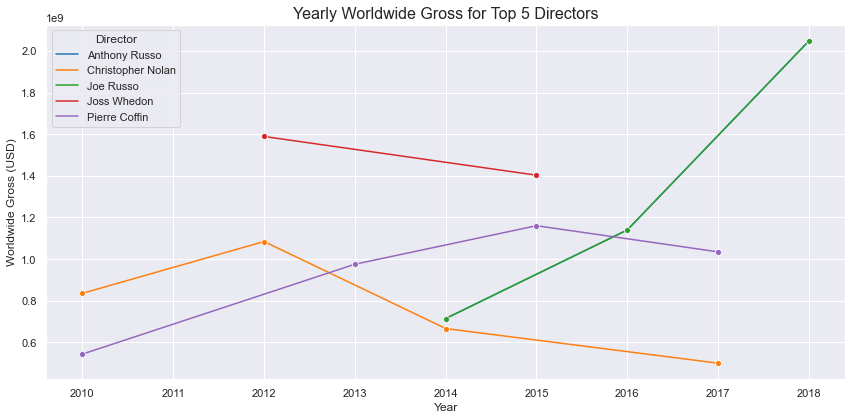

In [48]:
# Data Preparation for Over Time Analysis of Directors
# Get top 5 directors (first 5 entries from already sorted agg_directors_df)
top_5_directors = agg_directors_df.head(5)['director_name'].tolist()

# Filter directors_fgross_df for top 5 directors
filtered_df = directors_fgross_df[directors_fgross_df['director_name'].isin(top_5_directors)].copy()

# Clean 'worldwide_gross' column (remove $ and commas, convert to float)
filtered_df['worldwide_gross'] = (
    filtered_df['worldwide_gross']
    .replace({r'\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Group by director and start_year
grouped = (
    filtered_df
    .groupby(['director_name', 'start_year'])['worldwide_gross']
    .sum()
    .reset_index()
)
# Plot the line chart

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x='start_year',
    y='worldwide_gross',
    hue='director_name',
    palette='tab10',
    marker='o'
)

# customize 
plt.title('Yearly Worldwide Gross for Top 5 Directors', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Worldwide Gross (USD)', fontsize=12)
plt.legend(title='Director', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

##  Yearly Gross Trends: Director Insights & Strategy

###  Key Observations

- **Franchise Peaks**  
  The **Russo Brothers** and **Joss Whedon** see sharp revenue spikes during Marvel film releases, confirming that franchise titles consistently drive blockbuster earnings.

- **Animation’s Reliable Growth**  
  Directors like **Chris Coffin** demonstrate steady, year-over-year revenue increases, showcasing how animated sequels offer predictable, low-volatility returns unlike many live-action projects.

- **Director Consistency**  
  **Christopher Nolan** delivers consistently strong annual box office performance with original films, proving that non-franchise movies can still yield high revenue.

- **Strategic Release Timing**  
  Noticeable revenue dips between franchise film releases (e.g., gaps between Russo Bros’ Marvel movies) underscore the importance of planned release schedules to maintain audience momentum.


## Strategic Takeaways

1. **Invest in A‑List Directors for Tentpoles**  
   Franchise talents like the Russo Brothers and Nolan demand high fees but offer reliable blockbuster returns.

2. **Leverage Mid‑Tier Directors for Steady Growth**  
   Mid-tier directors specializing in sequels and genre films provide strong returns at more accessible budgets.

3. **Balance the Slate**  
   A mixed strategy—combining tentpole franchise films with recurring mid-market titles—builds brand strength and financial stability.

##  Core Insight

By analyzing yearly box office trends—franchise-driven peaks, animated stability, and consistent originals—studios can align talent and production schedules to optimize box office impact and financial sustainability.



##  4. Business Recommendations

Entering the entertainment industry demands strategic, data-driven investment. Our analysis of global film trends in genre performance, language strategy, and creative talent offers a playbook for building a profitable and sustainable production slate.

### Focus on High-Impact Genres

**Findings**  
- **Top Ratings**: Documentary, Classics, Anime & Manga consistently receive strong critical and audience acclaim.  
- **Strong ROI**: Cult Films, Horror, and Documentaries deliver excellent returns on smaller budgets.  
- **Niche Success**: Special Interest and Musical & Performing Arts perform well in targeted segments.  
- **Underperformers**: Faith & Spirituality and Westerns lag in both ratings and revenue.

**Recommendations**  
- Prioritize genres with both critical and financial strength (e.g., Documentaries, Cult Films).  
- Use cost-effective, high-ROI genres like Horror for early-stage projects.  
- Skip low-impact genres unless they uniquely serve branding or niche demand.  
- Experiment with genre hybrids to innovate while preserving appeal.

###  Language Strategy for Global Reach

**Findings**  
- English dominates global cinema.  
- French, Spanish, Japanese, and Russian produce impactful films despite smaller output.

**Recommendations**  
- Start with English-language production to maximize global exposure.  
- Plan multilingual or subtitled content to enter regional markets.  
- Monitor language trends to stay adaptive in shifting markets.


### Leverage Proven Directorial Talent

**Findings**  
- Directors such as the Russo Brothers, Nolan, and Michael Bay consistently generate top box office results through both franchise and original films.

**Recommendations**  
- Partner with high-grossing directors or study their methods for faster success.  
- Leverage director branding in marketing to attract investors and audiences.  
- Cultivate emerging talent with potential for similar impact at a lower cost.  
- Track director-level performance to identify long-term winners.


### Balance Ratings with Financial Returns

**Findings**  
- High ratings don’t always equate to strong ROI.  
- Some low-rated genres (e.g., Horror) deliver excellent profits due to cost efficiency and fan loyalty.

**Recommendations**  
- Evaluate genres through both critical acclaim and ROI before greenlighting.  
- Blend high-ROI genres with well-reviewed genres to balance credibility and revenue.  
- Stay agile by updating your genre mix as market and rating trends evolve.


### 5. Limitations of Our Analysis

**Coverage & Bias**  
- Some genres, directors, and languages were underrepresented, affecting generalizability.  

**Assumed Correlations**  
- We inferred connections between popularity, ratings, and ROI without access to profit or return data—future work should incorporate actual financials.  

**Genre Attribution**  
- We treated multi-genre films equally across all genres. More nuanced weighting could improve accuracy.

**Metadata Gaps**  
- Terms such as “popularity” lacked clear definitions, leading to interpretive assumptions.

**Integration Constraints**  
- Inconsistent identifiers across sources limited our ability to analyze director–genre success correlations.


### Further Areas for Exploration

- Incorporate **audience demographics** and regional preferences for segmentation  
- Analyze the impact of **marketing budgets** and distribution channels on ROI  
- Study creative contributions from **writers, actors, and producers**  
- Track **temporal shifts** (e.g., post-pandemic release trends) in viewing behavior
